## Predictive modeling

You will learn:
- type of data for modeling
- how to prepare the data
- learning models
- cross validation
- grid search
- predictive performance/evaluation measures
- make predictions

### Predictive modeling pipeline


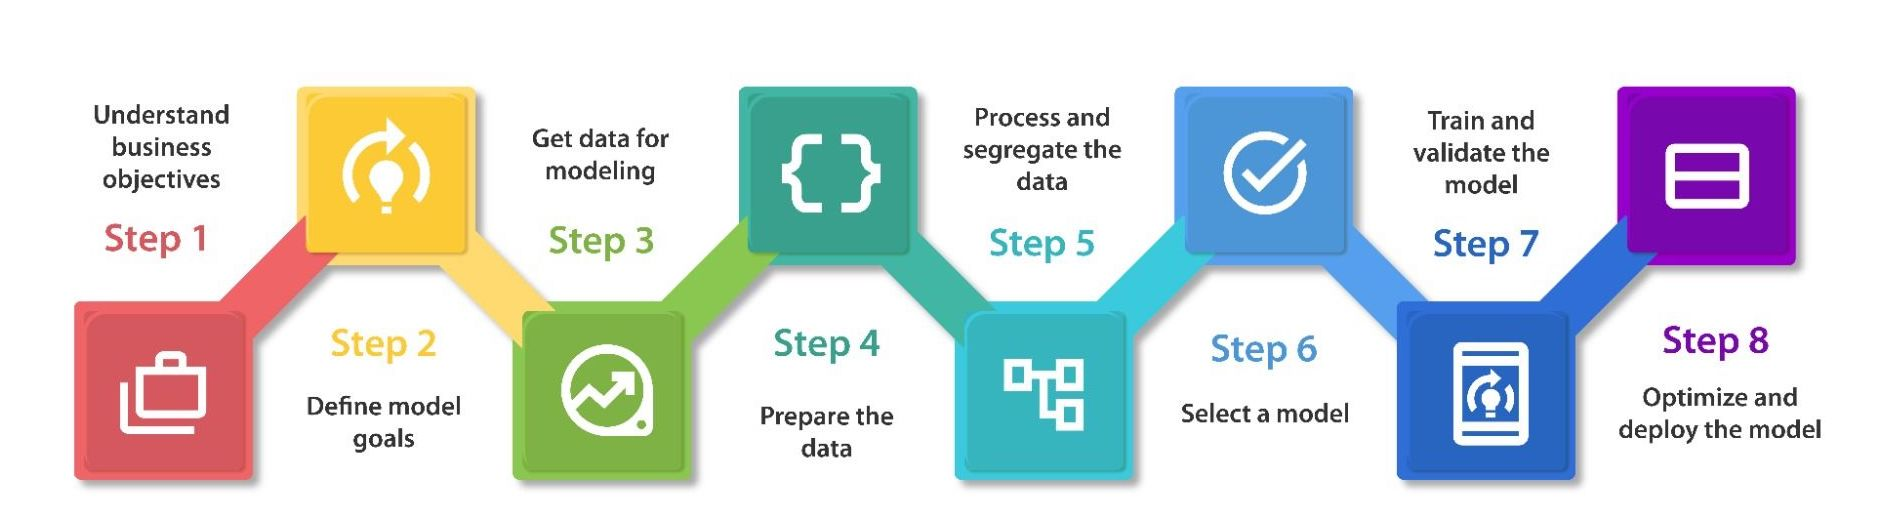

### Data for modeling


In [12]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read csv file into a pandas dataframe
data = pd.read_csv("students-performance.csv")

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,High
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,High
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,High
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,High
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,High


▶️ Data for predictive tasks include two types of variables: the **independent variables $(x_1, x_2, ..., x_n)$** and **dependent variable (target -- $y$)**.

▶️ This data set is used for **classification problems** (predict the class to which an observation belongs).

▶️ "class" is the target variable, which indicates if a final degree is high or low (binary).


In [7]:
data["class"].unique()

array(['High', 'Low'], dtype=object)

<span style="color:orange">**GOAL**</span>: predict the performance of a student (high or low) based on the student grades, demographic, social and school related features.

### Prepare the data

In general, classification models, cannot handle with missing values or categorical data.

In [11]:
# Check missing values
data.isnull().values.any() # No missing values!

False

Handling with categorical data using label encoding -- each category is assigned a value from 1 through N where N is the number of categories for the feature. There is no relation or order between these assignments.

In [13]:
le = LabelEncoder()
data_encoded = data.apply(le.fit_transform)

In [15]:
data_encoded.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,class
0,0,0,3,1,0,0,4,4,0,4,...,3,2,3,0,0,2,4,0,7,0
1,0,0,2,1,0,1,1,1,0,2,...,4,2,2,0,0,2,2,6,7,0
2,0,0,0,1,1,1,1,1,0,2,...,3,2,1,1,2,2,6,9,9,0
3,0,0,0,1,0,1,4,2,1,3,...,2,1,1,0,0,4,0,11,10,0
4,0,0,1,1,0,1,3,3,2,2,...,3,2,1,0,1,4,0,8,9,0


Split data into training and test sets

### Cross-validation

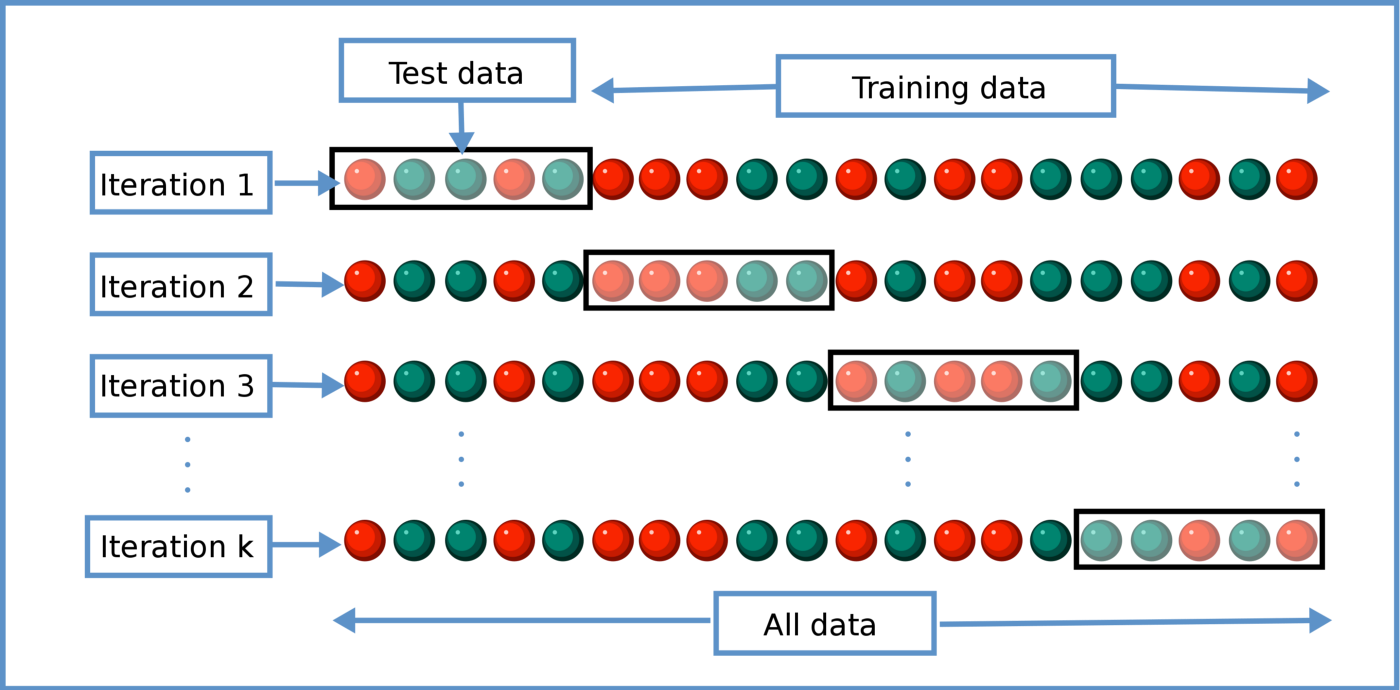